In [1]:
# importing libraries    
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd   
from sklearn.cluster import DBSCAN
from numpy import unique
from numpy import where
from matplotlib import pyplot

In [2]:
# Importing the dataset  
dataset = pd.read_csv('A5.csv')   
dataset.drop(dataset.index[dataset['game'] == 'Focused'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Sustained'], inplace = True)
display(dataset)
# statistics of the data
dataset.describe()

,id,child_gender,child_age,level,sequence_of_responses,sequence_of_stimuli,colour,order_of_selection,sequence_of_sides,no_of_clicks,...,correct_responses,commission_errors,omission_errors,mean_reaction_time,total_duration,diagnosis,percentage_no_of_correct_responses,game,CER,OER
0,1,2,5,NaN,"[C, C, C, C, W, C, C, W, M, C, C, C, C, C, C, ...","red star, red crab, red fish, blue fish, white...",NaN,NaN,"right, right, right, right, left, left, right,...",NaN,...,19,2,0,1144,57000,No,100.000000,Alternating,1.0,0.0
1,2,2,5,NaN,"[C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, ...","white bunny, pink pig, brown dog, red star, re...",NaN,NaN,"left, left, left, right, right, left, left, le...",NaN,...,18,0,1,1366,57000,No,94.736842,Alternating,0.0,1.0
2,3,2,5,NaN,"[M, W, C, C, C, C, C, C, C, C, M, C, W, C, C, ...","white bunny, red star, pink pig, red crab, red...",NaN,NaN,"left, right, left, right, right, left, right, ...",NaN,...,17,2,2,1525,57000,No,89.473684,Alternating,0.5,0.5
3,4,2,5,NaN,"[C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, ...","white bunny, pink pig, red star, red crab, bro...",NaN,NaN,"left, left, right, right, left, right, right, ...",NaN,...,19,0,0,1146,57000,No,100.000000,Alternating,0.0,0.0
4,5,2,5,NaN,"[C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, ...","white bunny, red star, red crab, pink pig, bro...",NaN,NaN,"left, right, right, left, left, left, right, r...",NaN,...,19,0,0,1135,57000,No,100.000000,Alternating,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2,5,0.0,"[C, C, C, C, C, C, C, C, C, C]",bee,yellow,"yellow_bee, yellow_bee, yellow_bee, yellow_bee...",NaN,10.0,...,6,0,0,0,25719,No,100.000000,Selective,0.0,0.0
96,97,2,5,0.0,"[C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, ...",bird,green,"yellow_bee, yellow_bee, yellow_bee, yellow_bee...",NaN,17.0,...,6,0,0,0,50461,No,100.000000,Selective,0.0,0.0
97,98,2,5,0.0,"[C, C, C, C, C, C, C, C, C, C, C, C, W]",butterfly,blue,"yellow_bee, yellow_bee, yellow_bee, yellow_bee...",NaN,13.0,...,7,1,0,0,19886,No,100.000000,Selective,1.0,0.0
98,99,2,5,0.0,"[C, W, C, C, C, W, C, C, C, C, C, W, W, W]",flower,pink,"yellow_bee, yellow_bee, yellow_bee, yellow_bee...",NaN,14.0,...,6,5,0,0,42199,No,100.000000,Selective,1.0,0.0


,id,child_gender,child_age,level,no_of_clicks,total_correct_responses,correct_responses,commission_errors,omission_errors,mean_reaction_time,total_duration,percentage_no_of_correct_responses,CER,OER
count,74.000000,74.000000,74.0,54.000000,54.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.00000,74.000000
mean,56.472973,1.797297,5.0,1.592593,7.000000,8.581081,7.945946,0.972973,0.635135,321.378378,25407.283784,92.681874,0.24611,0.186323
std,31.341785,0.404757,0.0,1.888581,2.355243,4.459887,4.372679,2.125984,1.400336,540.900561,21226.552038,16.762512,0.39064,0.343805
min,1.000000,1.000000,5.0,0.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000,5112.000000,12.500000,0.00000,0.000000
25%,19.250000,2.000000,5.0,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,10363.750000,94.736842,0.00000,0.000000
50%,63.500000,2.000000,5.0,1.000000,6.500000,7.000000,6.000000,0.000000,0.000000,0.000000,12783.000000,100.000000,0.00000,0.000000
75%,81.750000,2.000000,5.0,3.000000,8.000000,8.000000,8.000000,1.000000,1.000000,889.750000,57000.000000,100.000000,0.50000,0.300000
max,100.000000,2.000000,5.0,5.000000,17.000000,19.000000,19.000000,11.000000,7.000000,1525.000000,60000.000000,100.000000,1.00000,1.000000


In [3]:
# extracting only 11-comission & 12-omission
x = dataset.iloc[:, [19, 20]].values  
display(x)

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.8       , 0.2       ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.4       , 0.6       ],
       [0.6       , 0.4       ],
       [1.        , 0.        ],
       [0.6       , 0.4       ],
       [0.        , 0.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.6       , 0.4       ],
       [0.54545455, 0.45454545],
       [0.        , 0.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.

In [4]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

# statistics of scaled data
pd.DataFrame(x).describe()


,0,1
count,7.400000e+01,7.400000e+01
mean,3.150633e-17,-3.000603e-17
std,1.006826e+00,1.006826e+00
min,-6.343169e-01,-5.456425e-01
25%,-6.343169e-01,-5.456425e-01
50%,-6.343169e-01,-5.456425e-01
75%,6.543702e-01,3.329019e-01
max,1.943057e+00,2.382839e+00


C:\Users\Anuththara\AppData\Local\Temp\ipykernel_18028\1126609211.py:8: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(x)


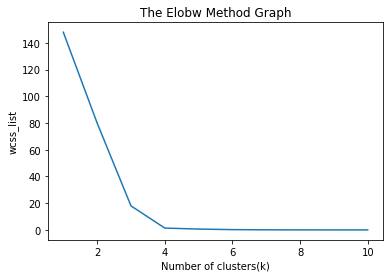

In [5]:
# Finding the optimal number of clusters using the elbow method
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()

[0 2 0 1 1 0 0 0 0 2 0 0 0 1 0 2 0 0 1 0 2 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 2
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 2 1 0 1 1 2 1 1 1 1 2 0 2 1 1 1 1 1 1 0 0 2]


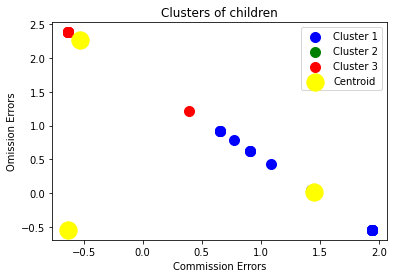

In [6]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  
print(y_predict)

#visulaizing the clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster    
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of children')  
mtp.xlabel('Commission Errors')  
mtp.ylabel('Omission Errors')  
mtp.legend()  
mtp.show()  

In [7]:
new_df = dataset.iloc[:, [19, 20]].copy()
new_df['clusters'] = y_predict
new_df.head()
display(new_df)

,CER,OER,clusters
0,1.0,0.0,0
1,0.0,1.0,2
2,0.5,0.5,0
3,0.0,0.0,1
4,0.0,0.0,1
...,...,...,...
95,0.0,0.0,1
96,0.0,0.0,1
97,1.0,0.0,0
98,1.0,0.0,0


# Cluster Analysis

## Cluster 1

In [8]:
len(new_df[new_df["clusters"] == 0])

22

In [9]:
cluster_0 = new_df[new_df["clusters"] == 0 ]

maxVal = cluster_0['CER'].max()
minVal = cluster_0['CER'].min()

print("CER min - ", minVal)
print("CER max - ", maxVal)
print()

maxVal = cluster_0['OER'].max()
minVal = cluster_0['OER'].min()

print("OER min - ", minVal)
print("OER max - ", maxVal)

CER min -  0.5
CER max -  1.0

OER min -  0.0
OER max -  0.5


,CER,OER,clusters
0,1.000000,0.000000,0
2,0.500000,0.500000,0
5,0.800000,0.200000,0
6,0.666667,0.333333,0
7,1.000000,0.000000,0
8,1.000000,0.000000,0
10,0.600000,0.400000,0
11,1.000000,0.000000,0
12,0.600000,0.400000,0
14,0.500000,0.500000,0


<AxesSubplot:>

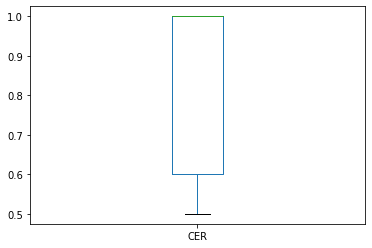

In [10]:
cluster_0 = new_df[new_df["clusters"] == 0 ]
display(cluster_0)
cluster_0.boxplot(column =['CER'], grid = False)

<AxesSubplot:>

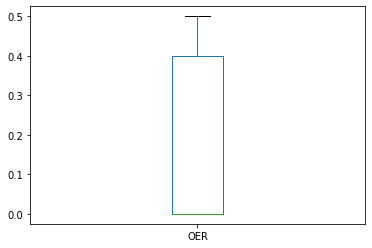

In [11]:
cluster_0.boxplot(column =['OER'], grid = False)

## Cluster 2

In [12]:
len(new_df[new_df["clusters"] == 1])

42

In [13]:
cluster_1 = new_df[new_df["clusters"] == 1 ]

maxVal = cluster_1['CER'].max()
minVal = cluster_1['CER'].min()

print("CER min - ", minVal)
print("CER max - ", maxVal)
print()

maxVal = cluster_1['OER'].max()
minVal = cluster_1['OER'].min()

print("OER min - ", minVal)
print("OER max - ", maxVal)

CER min -  0.0
CER max -  0.0

OER min -  0.0
OER max -  0.0


,CER,OER,clusters
3,0.0,0.0,1
4,0.0,0.0,1
13,0.0,0.0,1
18,0.0,0.0,1
49,0.0,0.0,1
50,0.0,0.0,1
51,0.0,0.0,1
52,0.0,0.0,1
53,0.0,0.0,1
54,0.0,0.0,1


<AxesSubplot:>

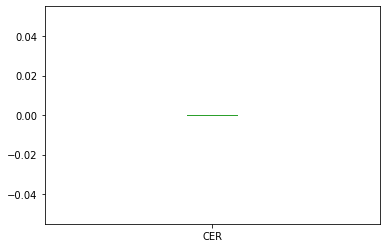

In [14]:
cluster_1 = new_df[new_df["clusters"] == 1 ]
display(cluster_1)
cluster_1.boxplot(column =['CER'], grid = False)

<AxesSubplot:>

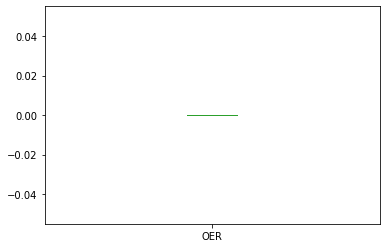

In [15]:
cluster_1.boxplot(column =['OER'], grid = False)

## Cluster 3

In [16]:
len(new_df[new_df["clusters"] == 2])

10

In [17]:
cluster_2 = new_df[new_df["clusters"] == 2 ]

maxVal = cluster_2['CER'].max()
minVal = cluster_2['CER'].min()

print("CER min - ", minVal)
print("CER max - ", maxVal)
print()

maxVal = cluster_2['OER'].max()
minVal = cluster_2['OER'].min()

print("OER min - ", minVal)
print("OER max - ", maxVal)

CER min -  0.0
CER max -  0.4

OER min -  0.6
OER max -  1.0


,CER,OER,clusters
1,0.0,1.0,2
9,0.4,0.6,2
15,0.0,1.0,2
46,0.0,1.0,2
62,0.0,1.0,2
78,0.0,1.0,2
83,0.0,1.0,2
88,0.0,1.0,2
90,0.0,1.0,2
99,0.0,1.0,2


<AxesSubplot:>

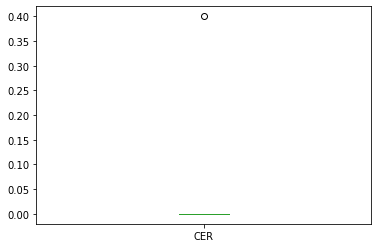

In [18]:
cluster_2 = new_df[new_df["clusters"] == 2 ]
display(cluster_2)
cluster_2.boxplot(column =['CER'], grid = False)

<AxesSubplot:>

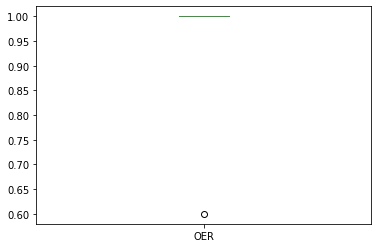

In [19]:
cluster_2.boxplot(column =['OER'], grid = False)

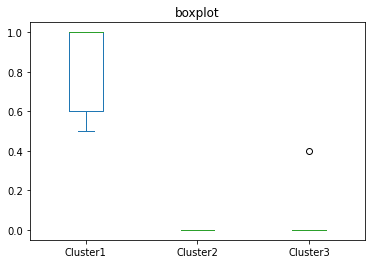

In [20]:
from matplotlib import pyplot as plt

# Pandas dataframe
data = pd.DataFrame({"Cluster1": cluster_0['CER'], "Cluster2": cluster_1['CER'], "Cluster3": cluster_2['CER']})

# Plot the dataframe
ax = data[['Cluster1', 'Cluster2', 'Cluster3']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

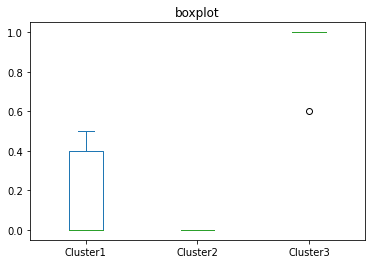

In [21]:
from matplotlib import pyplot as plt

# Pandas dataframe
data = pd.DataFrame({"Cluster1": cluster_0['OER'], "Cluster2": cluster_1['OER'], "Cluster3": cluster_2['OER']})

# Plot the dataframe
ax = data[['Cluster1', 'Cluster2', 'Cluster3']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()